<a href="https://colab.research.google.com/github/Adolfo-Hugo/previsao-monte-carlo/blob/main/previs%C3%A3o_modelo_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

**CARREGANDO E VISUALIZANDO DATAFRAME**

In [ ]:
df = pd.read_csv('acoes.csv')
df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


**VISUALIZANDO DF EM GRAFICOS**

In [ ]:
figura = px.line(title ='Historico preco das acoes')
for i in df.columns[1:]:
    figura.add_scatter(x=df['Date'], y=df[i], name=i)
figura.show()

**FILTRANDO DF PARA ACOES DA MGLU**

In [ ]:
df_bova = pd.DataFrame(df['BOVA'])
df_bova


,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
1441,95.800003
1442,92.430000
1443,92.910004
1444,90.660004


**NORMALIZANDO DADOS**

In [ ]:
df_normalizado = df_bova.copy()
for i in df_bova:
  df_normalizado[i] = df_bova[i]/df_bova[i][0]
df_normalizado

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
1441,2.027084
1442,1.955777
1443,1.965933
1444,1.918324


**TAXA DE RETORNO**

In [ ]:
df_taxa_retorno = np.log(1+df_normalizado.pct_change())
df_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
1441,-0.010074
1442,-0.035811
1443,0.005180
1444,-0.024515


**MEDIA DA TAXA DE RETORNO**

In [ ]:
media = df_taxa_retorno.mean()
media

,0
BOVA,0.000464


**VARIANCA DA TAXA DE RETORNO**

In [ ]:
varianca = df_taxa_retorno.var()
varianca

,0
BOVA,0.000304


In [ ]:
drift = media - (0.5* varianca)
drift

,0
BOVA,0.000312


**CALCULO DOS RETORNOS DIARIOS**

In [ ]:
dias_frente  = 976
simulacoes =10


DESVIO PADROÃO: O QUANTO AS TX RETORNOS ESTAO AFASTADAS DA MEDIA

In [ ]:
desvio_padrao = df_taxa_retorno.std()
desvio_padrao

,0
BOVA,0.017432


In [ ]:
z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))
z.shape

(976, 10)

In [ ]:
z

array([[ 0.34254657, -0.69417236, -0.14220994, ...,  1.5081163 ,
         0.01057931,  1.83029465],
       [ 0.74421924, -0.09104357, -0.60031419, ..., -0.66765208,
        -0.99182934,  0.22366678],
       [ 0.13643182, -0.07242969, -2.00601502, ..., -1.35169898,
        -1.19345635, -0.9698457 ],
       ...,
       [-0.32089373, -0.3791705 , -0.60337596, ...,  0.46024017,
         0.03844568,  0.60085798],
       [ 0.18210335,  0.42746966, -0.47234357, ...,  0.47407726,
        -0.92324237,  1.19084756],
       [-0.77338314,  1.39160128, -1.38549252, ..., -0.20735467,
        -0.59476143,  2.53132744]])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

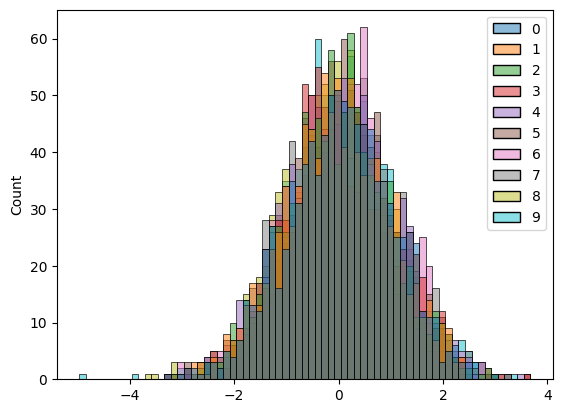

In [ ]:
sns.histplot(z);

In [ ]:
retorno_diario = np.exp(drift.values + z*desvio_padrao.values)
retorno_diario

array([[1.00630314, 0.9882806 , 0.99783549, ..., 1.02695842, 1.00049667,
        1.03274223],
       [1.01337392, 0.99872588, 0.98989888, ..., 0.98873759, 0.98316597,
        1.00421994],
       [1.00269401, 0.99904999, 0.96593715, ..., 0.97701767, 0.97971646,
        0.98354281],
       ...,
       [0.99473227, 0.99372226, 0.98984605, ..., 1.00836982, 1.00098279,
        1.0108446 ],
       [1.00349262, 1.00779395, 0.99210958, ..., 1.00861307, 0.98434215,
        1.02129441],
       [0.98691693, 1.02487471, 0.97644229, ..., 0.99670299, 0.9899947 ,
        1.04544011]])

In [ ]:
retorno_diario.shape

(976, 10)

In [ ]:
retorno_diario

array([[1.00630314, 0.9882806 , 0.99783549, ..., 1.02695842, 1.00049667,
        1.03274223],
       [1.01337392, 0.99872588, 0.98989888, ..., 0.98873759, 0.98316597,
        1.00421994],
       [1.00269401, 0.99904999, 0.96593715, ..., 0.97701767, 0.97971646,
        0.98354281],
       ...,
       [0.99473227, 0.99372226, 0.98984605, ..., 1.00836982, 1.00098279,
        1.0108446 ],
       [1.00349262, 1.00779395, 0.99210958, ..., 1.00861307, 0.98434215,
        1.02129441],
       [0.98691693, 1.02487471, 0.97644229, ..., 0.99670299, 0.9899947 ,
        1.04544011]])

**PREVISOES DE PRECOS FUTUROS**

In [ ]:
previsoes = np.zeros_like(retorno_diario)
previsoes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_bova.iloc[-1]

,1445
BOVA,92.410004


In [ ]:
previsoes[0] = df_bova.iloc[-1]
previsoes

array([[92.41000366, 92.41000366, 92.41000366, ..., 92.41000366,
        92.41000366, 92.41000366],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
for dia in range(1, dias_frente):
  previsoes[dia] = previsoes[dia-1]*retorno_diario[dia]
previsoes

array([[ 92.41000366,  92.41000366,  92.41000366, ...,  92.41000366,
         92.41000366,  92.41000366],
       [ 93.64588744,  92.29226208,  91.47655899, ...,  91.36924435,
         90.85437083,  92.79996847],
       [ 93.89817083,  92.20458375,  88.3606068 , ...,  89.26936616,
         89.01152277,  91.27274147],
       ...,
       [226.50859735,  74.97946637,  83.25364427, ..., 212.9947314 ,
         37.53122921, 138.55758788],
       [227.29970543,  75.56385243,  82.59673806, ..., 214.82927027,
         36.94357071, 141.50809003],
       [224.3259284 ,  77.44348123,  80.65094822, ..., 214.12097615,
         36.57393922, 147.93823278]])

In [ ]:
previsoes.T.shape

(10, 976)

In [ ]:
figura = px.line(title = 'PREVISOES DAS SIMULAÇÕES DE ACOES - BOVA')
for i in range(len(previsoes.T)):
  figura.add_scatter( y= previsoes.T[i], name = i)
figura.show()

**COMPARACAO PREVISOES COM PRECOS REAIS**

In [ ]:
import yfinance as yf
dataset_bova = yf.download(tickers ='BOVA11.SA', start='2020-11-04')


[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset_bova

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-04,93.510002,94.629997,92.849998,94.160004,94.160004,12844440
2020-11-05,95.769997,97.169998,95.379997,96.949997,96.949997,12692230
2020-11-06,96.089996,97.339996,96.089996,97.190002,97.190002,8765724
2020-11-09,100.389999,101.150002,99.269997,99.500000,99.500000,19613780
2020-11-10,99.930000,101.820000,99.730003,101.000000,101.000000,13893580
...,...,...,...,...,...,...
2024-09-27,129.369995,130.330002,129.039993,129.039993,129.039993,5342563
2024-09-30,129.839996,129.839996,128.369995,128.429993,128.429993,4930837
2024-10-01,128.899994,129.850006,128.449997,128.860001,128.860001,7392815


In [ ]:

dataset_bova.rename(columns={'Adj Close':'MGLU'}, inplace=True)
dataset_bova = dataset_bova['MGLU']
dataset_bova

,MGLU
Date,
2020-11-04,94.160004
2020-11-05,96.949997
2020-11-06,97.190002
2020-11-09,99.500000
2020-11-10,101.000000
...,...
2024-09-27,129.039993
2024-09-30,128.429993
2024-10-01,128.860001


**SAVALNDO DF**

In [ ]:
dataset_bova.to_csv('magazine_teste.csv')

**IMPORTANDO DF**

In [ ]:
dataset_bova = pd.read_csv('magazine_teste.csv')
dataset_bova

,Date,MGLU
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
...,...,...
971,2024-09-27,129.039993
972,2024-09-30,128.429993
973,2024-10-01,128.860001
974,2024-10-02,129.850006


In [ ]:
len(dataset_bova)

976

In [ ]:

dataset_bova

,Date,MGLU
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
...,...,...
971,2024-09-27,129.039993
972,2024-09-30,128.429993
973,2024-10-01,128.860001
974,2024-10-02,129.850006


In [ ]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([ 92.41000366,  93.64588744,  93.89817083,  95.79115548,
        99.44007082, 100.03459949,  98.94976802,  97.93749819,
        95.09401731,  96.76598881,  95.46112755,  90.16555831,
        90.82140728,  90.90756509,  87.887866  ,  88.85997377,
        89.59174295,  88.78383182,  87.40403181,  87.37230352,
        87.36423641,  87.45902837,  88.45190899,  90.34739486,
        88.34326276,  88.60141704,  90.81104262,  91.37142627,
        88.52961982,  88.65472016,  87.36190338,  87.00314188,
        88.07494371,  89.55171815,  89.34740433,  88.64776497,
        87.83350176,  86.90618361,  85.57367789,  85.40848933,
        83.88493576,  84.7887576 ,  87.98618146,  88.30890073,
        91.1358208 ,  92.84698473,  93.99841873,  96.32959253,
        95.39862737,  93.00990325,  91.09968299,  89.0811714 ,
        90.11338679,  90.03441027,  88.20321565,  87.05144678,
        86.0978607 ,  89.05164317,  86.22314054,  84.79848554,
        83.62733095,  82.59939831,  84.06172129,  85.28

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['MGLU'], simulacao1)

28.31404013509863

In [ ]:
erros =[]
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['MGLU'], simulacao))

erros

[28.31404013509863,
 31.794765247369092,
 31.613738444840372,
 14.686214955339103,
 20.596187387127156,
 50.00292475854113,
 118.38331084352176,
 39.432010924805226,
 45.887626175525554,
 32.03585223541658]

In [ ]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['MGLU'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[7], name = 'Melhor  simulação')
figura.add_scatter(y = previsoes.T[2], name = 'Pior simulação')